# Example 11-3: Logistic function

We will provide another demonstration of Euler's method, and this time, we will build on the previous example by also writing a standalone function for Euler's method.
The advantage of this structure is that the function for Euler's method becomes generic and can be reused for any ODE function $f(t, y)$.

## Summary of commands

In this exercise, we will demonstrate the following:
- Writing our own function in Python.
- Having functions as the _input arguments_ to other functions.

The second point is especially cool.
The syntax might look something like this:

```python
def outer_function(f, a, b):
    ans = f(a, b)    # note this!
    return ans

def input_function(c, d):
    return 2 * c  + d

# calling it
outer_function(input_function, 1, 2)
```

## Euler's method with standalone function

Consider the logistic equation we've previously seen:

$$ y' = f(t, y) = r \left( 1 - \frac{y}{K} \right) y $$

where the intrinsic growth rate $r$ and the carrying capacity $K$ are selected to be $r = 0.5$ and $K = 10$.
The initial population is $y_0 = 0.2$.
We will solve this ODE for the range $0 \le t \le 20$.

Before we write our standalone Euler's method function, we'll sketch the ideas using **pseudocode** (generally helpful!)

```
def my_euler(input_args):
    create array of time values from t0 to tf, spaced by h
    initialize y array with y0
    set counter n = 1
    until tf is reached, loop:
        update y based on h * first_derivative_function
        increment counter n by 1
    return the time and y arrays
```

Writing pseudocode can help us validate our logic for consistency without being limited by the syntax of Python.
We can also anticipate the input arguments we need; in particular, we see where our custom ODE function plugs into the `first_derivative_function` above.
Below we give the solution first using a `while` loop.

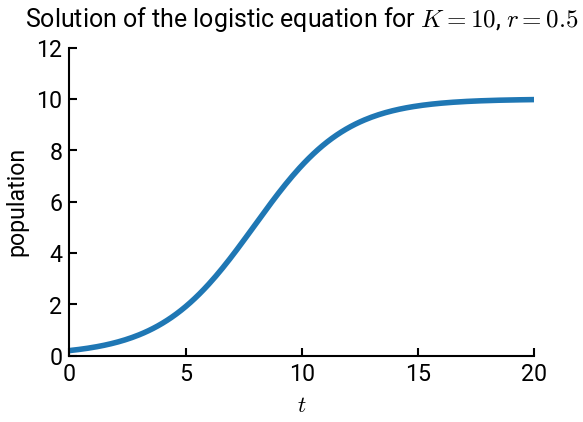

In [11]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# logistic function
def logistic(t, y):
    K = 10
    r = 0.5
    return r * y * (1 - y/K)

# Euler's method function
def my_euler(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    y = [y0]
    n = 0
    while t[n] < tf:
        y.append(y[n] + h * f(t[n], y[n]))
        n += 1
    return t, np.array(y)    # convert y to NumPy array for consistency

# initialize
y0 = 0.2
t0 = 0
tf = 20
h = 0.1

# execute the Euler method solver
t, y = my_euler(logistic, t0, tf, y0, h)

# plot the result
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set(xlabel='$t$', ylabel='population', xlim=[0, tf], ylim=[0, 12])
ax.set_title(r"Solution of the logistic equation for $K = 10$, $r = 0.5$", fontsize=18, pad=15)
plt.show()

We could, of course, just as easily have done the same with a `for` loop in `my_euler()`.

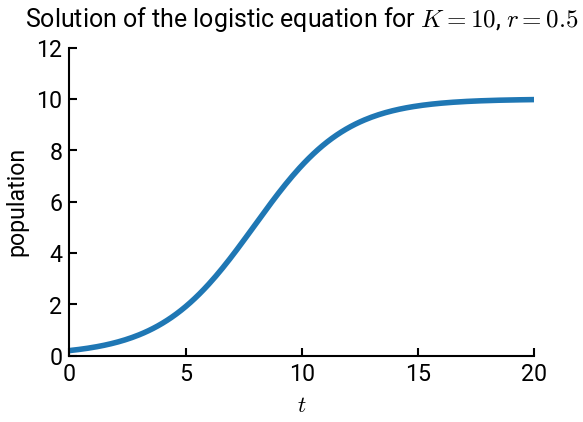

In [12]:
# Euler's method function
def my_euler_for(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    y = [y0]
    for n in range(len(t) - 1):
        y.append(y[n] + h * f(t[n], y[n]))
    return t, np.array(y)    # convert y to NumPy array for consistency

# execute the Euler method solver
t, y = my_euler_for(logistic, t0, tf, y0, h)

# plot the result
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set(xlabel='$t$', ylabel='population', xlim=[0, tf], ylim=[0, 12])
ax.set_title(r"Solution of the logistic equation for $K = 10$, $r = 0.5$", fontsize=18, pad=15)
plt.show()